In [1]:
import numpy as np
import pandas as pd

from pathlib import Path

import sys

sys.path.append('../src')

import warnings
warnings.filterwarnings("ignore")

### Test Payoff + Attendance + FRA agents

In [2]:
from Classes.bar import Bar
from Utils.interaction import Episode
from Classes.cognitive_model_agents import Titan

In [3]:
free_parameters = {
    'inverse_temperature': 10,
    'learning_rate': 0.1,
    'bias': 0.5,
    'len_history': 2,
    'max_regions': 5,
    'delta': 0.05,
}
fixed_parameters = {
    'num_agents': 7,
    'threshold': 0.7,
}
n = 1

In [4]:
# Create the environment
bar = Bar(
    num_agents=fixed_parameters['num_agents'],
    threshold=fixed_parameters['threshold']
)
# Create the agents
agents = [Titan(free_parameters, fixed_parameters, n) for n in range(fixed_parameters['num_agents'])]
# Create the episode
episode = Episode(
    model='FRA',
    agents=agents,
    environment=bar,
    num_rounds=20
)

In [5]:
# episode.agents[0].debug = True
# episode.agents[1].debug = True
episode.run()

<Axes: >

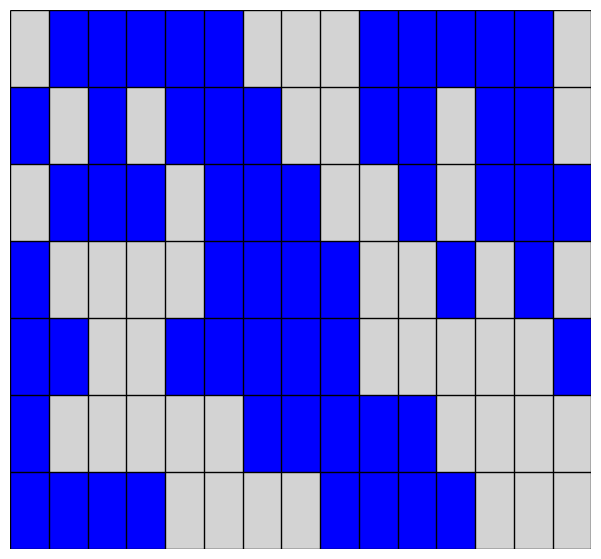

In [6]:
bar.render()

# Test parameter fit

In [7]:
from Classes.parameter_recovery import ParameterFit

In [8]:
# Create paths for data and results
data_folder = Path('..', 'data', 'human')
folder_2P = Path('..', 'reports', 'MLE')
folder_2P.mkdir(parents=True, exist_ok=True)

file_name = f'best_fit_2P_3.json'
best_fit_file_2P = Path(folder_2P, file_name)

In [9]:
#Load 2P data

file_name = '2-player-UR.csv'
file = data_folder / Path(file_name)
print(f'Loading data from {file}...')
data = pd.read_csv(file)
data.head(2)

Loading data from ../data/human/2-player-UR.csv...


,source,treatment,group,round,player,choice,score,attendance,ac_score,threshold,num_players,room,decision
0,human,score + grid,Grupo-0001,1,405186428721292,0,0,1,25,0.5,2,Grupo-0001,0
1,human,score + grid,Grupo-0001,1,728608683559397,1,1,1,25,0.5,2,Grupo-0001,1


In [10]:
# check_out_these = ['Attendance-M2', 'MFP-M2', 'Payoff-M2']
my_models = [Titan]

ParameterFit.run(
    data=data,
    model_list=my_models,
    best_fit_path=best_fit_file_2P,
    new_file=False
)

Fitting models...:   0%|                                  | 0/1 [00:00<?, ?it/s]

Fitting data to model FRA...
Creating parameter recovery class...
Running bayesian optimizer...
Finding deviance for 2 players and threshold 0.5...
|   iter    |  target   | invers... |   bias    | learni... | len_hi... | max_re... |   delta   |
-------------------------------------------------------------------------------------------------
| 1         | -3081.551 | 27.272386 | 0.7203244 | 0.0001143 | 1.3023325 | 2.3208030 | 0.0092338 |
| 2         | -4390.503 | 12.734393 | 0.3455607 | 0.3967674 | 1.5388167 | 4.7727506 | 0.0685219 |
| 3         | -2378.481 | 13.880491 | 0.8781174 | 0.0273875 | 1.6704675 | 4.7557432 | 0.0558689 |
| 4         | -6884.174 | 9.8443771 | 0.1981014 | 0.8007445 | 1.9682615 | 3.8208176 | 0.0692322 |
| 5         | -5285.894 | 56.212516 | 0.8946066 | 0.0850442 | 1.0390547 | 2.5284737 | 0.0878142 |
| 6         | -4430.048 | 7.1958505 | 0.4211076 | 0.9578895 | 1.5331652 | 7.2268940 | 0.0315515 |
| 7         | -3940.795 | 44.249558 | 0.8346256 | 0.0182882 | 1.7501

Fitting models...: 100%|██████████████████████████| 1/1 [00:12<00:00, 12.60s/it]

| 24        | -6014.389 | 39.745018 | 0.5975777 | 0.5006298 | 1.8928591 | 4.5683614 | 0.0213017 |
Optimal parameters for 2 players and threshold 0.5:
{'inverse_temperature': np.float64(55.46199207915088), 'bias': np.float64(0.6339556411797106), 'learning_rate': np.float64(0.008171747655530526), 'len_history': np.float64(1.2165937548253885), 'max_regions': np.float64(2.120556077471169), 'delta': np.float64(0.006445347468755036)}
Deviance: -2298.0826120602683
AIC: 4608.165224120537
--------------------------------------------------
